### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The indepedent variable is the type of word conditions(congruent/incongruent)

The dependent variable is the time to read word

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The hypothesis for this task will be the following:

Mean reading time of congruent word for the population = $\mu$

Mean reading time of incongruent word for the population = $\mu1$

$H0 : \mu - \mu1 = 0$

$H1 : \mu - \mu1 \not= 0$

I will test the hypothesis that the difference in mean between the 2 tests is significant or not. The null hypothesis is that there is no difference in mean of time reading between congruent word and incongruent word for the population. The alternative hypothesis is to check if there is a difference between the 2 tests i.e the difference is not null.

We should notice that the participants have been used for both tests. I will perform a paired t-test on two related sample of scores.

However we will make some assumptions:

* The differences are of measurement variables

* The sampling is random and pairs of observations is independent

* The distribution of the mean is normal. To be true, the sample size should be at least as a minimum 30 (as per central limit theorem amongst others). As our sample is here only 24 the assumption might be not guaranteed depending on the distribution shape of the population. For a moderate or highly skewed population a sample size of 10 or 20(accordingly) is sufficient however. So we will make an additional assumption that the population is normal. In this case the size is not an issue and we can be rather confident that our analysis will be valid.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd

data=pd.read_csv('stroopdata.csv')
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


The mean of reading time for congruent word is 14.05 with a standard deviation of 3.559 which is lower than the mean for incongruent word 22.01 with a standard deviation of 4.797

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Text(0.5,1,'Stroop Effect')

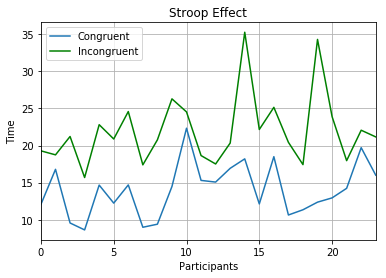

In [5]:
data['Congruent'].plot(kind='line', grid=True)
data['Incongruent'].plot(kind='line', color='green', grid=True)
plt.xlabel('Participants')
plt.legend(loc='upper left')
plt.ylabel('Time')
plt.title('Stroop Effect')

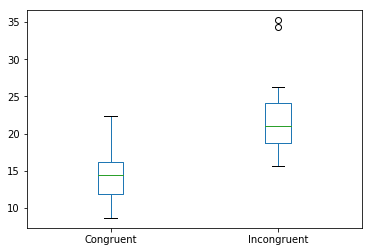

In [6]:
data.plot(kind='box')

We observe some outliers in the incongruent data but the results are close each other. For the congruent part, the score (tiem to read) is more wider. Between the 2 tests, participants have relatively closed results with a small difference but from the participant 14 and above it is not anymore the case.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
import scipy.stats as stats

cong=data.Congruent.values.tolist()
icong=data.Incongruent.values.tolist()

stats.ttest_rel(cong,icong)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

I have calculated the T-test for the means of two dependent samples of scores (time to read word). The significance level will be set $\alpha$ = 0.05. In this 2 sided test, we have a t critical value equal to 2.069 (according to tables) for a degree of freedom of 23 and 1-$\alpha$/2 = 0.975. According to the result of pvalue which is quite low we can reject H0 at a confidence level of 95%. This is confirmed with the absolute value of t stats which is higher than the t critical value. This is in relation with our observations which indicate that reading a congruent word is quicker than an incongruent one.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The interference occurs no matter hard we try. It is a conflict between 2 areas in the brain:anterior cingulate cortex and dorso-lateral prefrontal cortex. The brain naturally read before understanding i.e."as habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort.When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer." source [3]  

There are some alternative experiments with stroop effect basis such as numerical stroop effect with incongruent numeric($\large3$ vs 2) and congruent numeric ($\large 2$ vs 3). Studies show that there is also a delay in the answering.

References:

[1]https://www.psytoolkit.org/lessons/stroop.html

[2]https://en.wikipedia.org/wiki/Stroop_effect

[3]https://imotions.com/blog/the-stroop-effect/

[4]http://influentialpoints.com/Training/paired_t-test-principles-properties-assumptions.htm

[5]https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm

[6]http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf